## **Overview of Machine Learning and Deep Learning Concepts**

This repository is focused on exploring the realm of machine learning and deep learning algorithms.

In [1]:
 # import all the libraries required for this chapter
# Machine Learning Libraries: scikit-learn, keras and tensorflow

# setting seed for model reproducibility
seed_value = 42
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import normalize, Normalizer, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
import sklearn.cluster as cluster
import lightgbm as lgb
import xgboost as xgb

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from keras.utils import np_utils

# plotting libraries
import matplotlib as mpl
import matplotlib.style
import seaborn as sns  # visualization
import matplotlib.pyplot as plt
# formatting for decimal places
pd.set_option("display.float_format", "{:.2f}".format)
plt.style.use("seaborn-white")
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Merged_Data.csv to Merged_Data.csv


In [3]:
# import the .csv file as a dataframe - Raw Data File
data = pd.read_csv('Merged_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5127 entries, 0 to 5126
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             5127 non-null   object 
 1   DEPTH (M)             5127 non-null   float64
 2   BVW (V/V)             4891 non-null   float64
 3   CARB_FLAG (UNITLESS)  4980 non-null   float64
 4   COAL_FLAG (UNITLESS)  5127 non-null   float64
 5   KLOGH (MD)            4891 non-null   float64
 6   PHIF (V/V)            4891 non-null   float64
 7   RHOFL (G/CM3)         5127 non-null   float64
 8   RHOMA (G/CM3)         4891 non-null   float64
 9   RW (OHMM)             4891 non-null   float64
 10  SAND_FLAG (UNITLESS)  4891 non-null   float64
 11  SW (V/V)              4891 non-null   float64
 12  TEMP (DEGC)           4891 non-null   float64
 13  VSH (V/V)             4891 non-null   float64
 14  LITHOTYPE             5127 non-null   object 
dtypes: float64(13), objec

In [4]:
# Basic Exploratory Data Analysis and Data Cleaning
print(data.head(10))
print('Shape of Dataset (rows,columns):', data.shape)

   WELL NAME  DEPTH (M)  BVW (V/V)  ...  TEMP (DEGC)  VSH (V/V)      LITHOTYPE
0  15/9-19 A    3666.59       0.11  ...       112.72       0.60          OTHER
1  15/9-19 A    3666.74       0.11  ...       112.73       0.60          OTHER
2  15/9-19 A    3666.90       0.11  ...       112.73       0.60          OTHER
3  15/9-19 A    3667.05       0.11  ...       112.74       0.60          OTHER
4  15/9-19 A    3667.20       0.12  ...       112.74       0.60  CLST.SLTY-X-X
5  15/9-19 A    3667.35       0.11  ...       112.74       0.60          OTHER
6  15/9-19 A    3667.51       0.12  ...       112.75       0.60          OTHER
7  15/9-19 A    3667.66       0.12  ...       112.75       0.60          OTHER
8  15/9-19 A    3667.81       0.13  ...       112.75       0.60          OTHER
9  15/9-19 A    3667.96       0.13  ...       112.76       0.61  CLST.SLTY-X-X

[10 rows x 15 columns]
Shape of Dataset (rows,columns): (5127, 15)


Until this point there is no data cleaning being performed. The objective of the next few sections is to wrangle the data and prepare it for the machine learning model stage. The current dataset consists of petrophysical properties from two different wells in Volve field. A majority of columns have float datatype except Well Name and Lithotype. In the case of regression problems, only quantitative columns would be considered, whereas in the case of classification, 'Lithotype' would be the response variable.

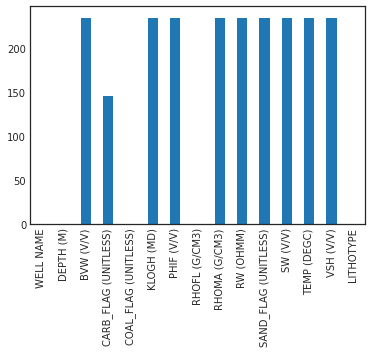

In [5]:
# Find number of empty/NA values in each column
data.isna().sum().plot(kind="bar")

In [6]:
# Descriptive Statistics
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
WELL NAME,5127,2,15/9-19 BT2,3162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEPTH (M),5127.00,NaN,NaN,NaN,3935.10,153.56,3666.59,3814.95,3912.57,4054.53,4249.83
BVW (V/V),4891.00,NaN,NaN,NaN,0.10,0.06,0.00,0.06,0.09,0.12,0.25
CARB_FLAG (UNITLESS),4980.00,NaN,NaN,NaN,0.03,0.18,0.00,0.00,0.00,0.00,1.00
COAL_FLAG (UNITLESS),5127.00,NaN,NaN,NaN,0.01,0.07,0.00,0.00,0.00,0.00,1.00
KLOGH (MD),4891.00,NaN,NaN,NaN,199.85,700.43,0.00,0.00,0.00,23.31,13705.31
PHIF (V/V),4891.00,NaN,NaN,NaN,0.14,0.06,0.00,0.10,0.14,0.20,0.36
RHOFL (G/CM3),5127.00,NaN,NaN,NaN,0.86,0.05,0.80,0.80,0.90,0.90,0.90
RHOMA (G/CM3),4891.00,NaN,NaN,NaN,2.66,0.01,2.63,2.65,2.66,2.66,2.71
RW (OHMM),4891.00,NaN,NaN,NaN,0.02,0.00,0.02,0.02,0.02,0.02,0.02


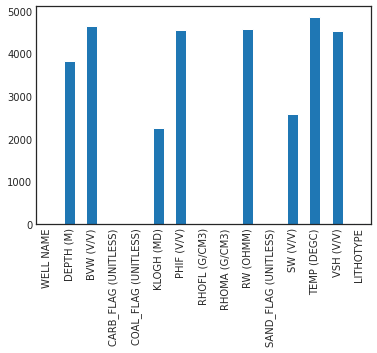

In [7]:
# Number of unique values
data.nunique().plot(kind="bar")

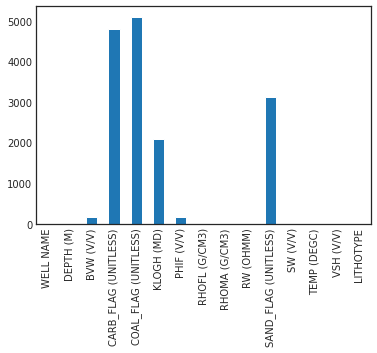

In [8]:
# Data Cleaning - How many columns have Null or value=0
data[data == 0].count(axis=0).plot(kind='bar')

In [9]:
data.dropna(inplace=True)
print('Shape of Dataset (rows,columns):', data.shape)

Shape of Dataset (rows,columns): (4818, 15)


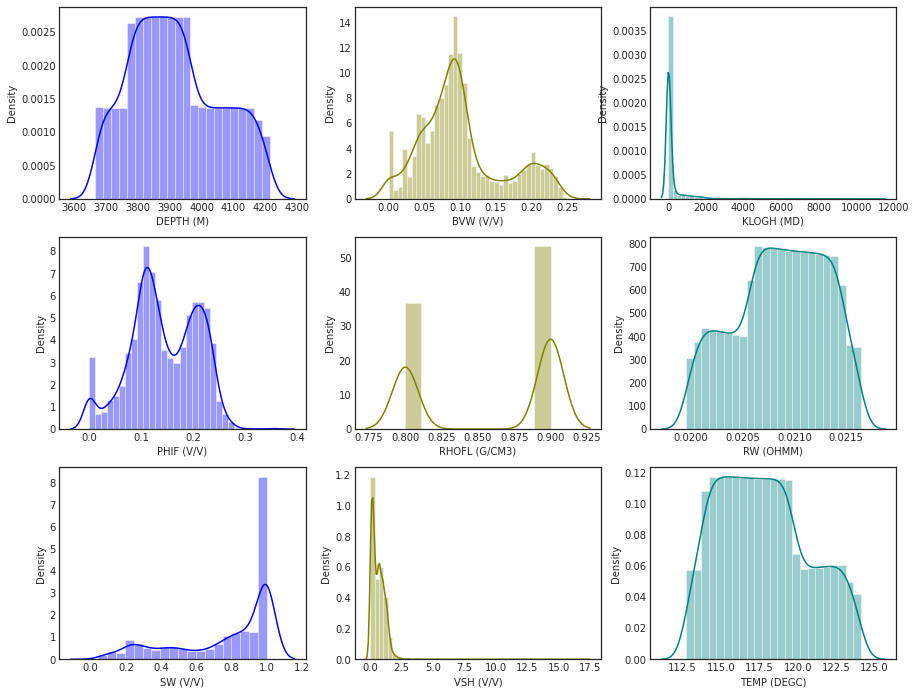

In [10]:
# Histogram - Distributions of continuous variables - only key features are shown here
# sns.set(color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=False)
sns.distplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.distplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.distplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.distplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.distplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.distplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.distplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.distplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.distplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

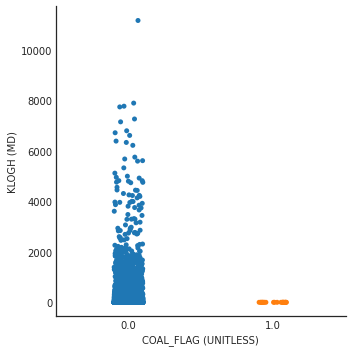

In [11]:
# plotting some categorical variables
sns.catplot(x="COAL_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="SAND_FLAG (UNITLESS)", y="KLOGH (MD)", data=data)
# sns.catplot(x="RHOFL (G/CM3)", y="KLOGH (MD)", data=data)

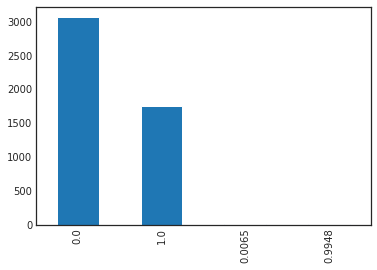

In [12]:
# data['CARB_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
# data['COAL_FLAG (UNITLESS)'].value_counts().plot(kind='bar')
data['SAND_FLAG (UNITLESS)'].value_counts().plot(kind='bar')

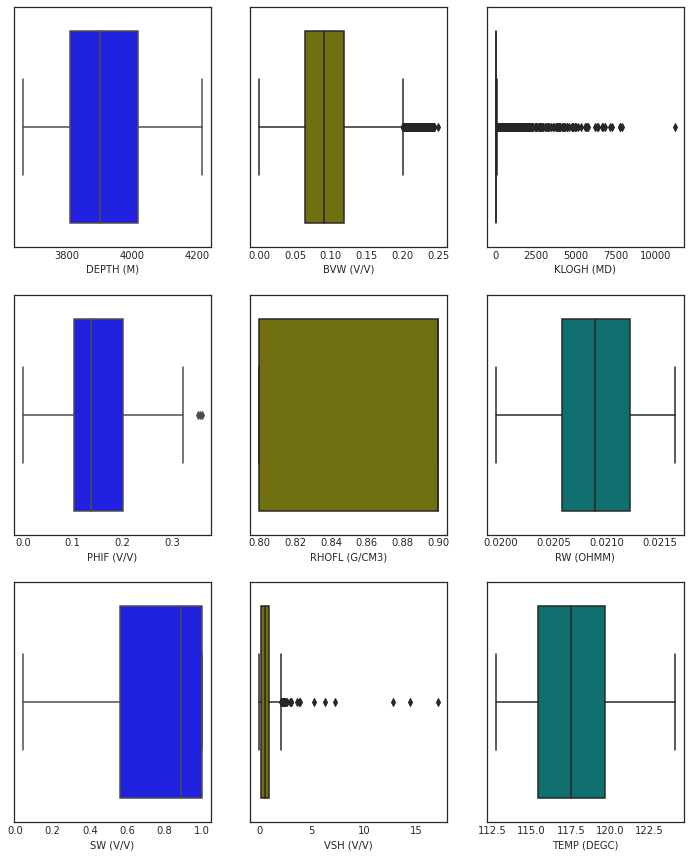

In [13]:
# Box Plots - Useful Tool to detect outliers
f, axes = plt.subplots(3, 3, figsize=(12, 15), sharex=False)
sns.boxplot(data["DEPTH (M)"], color="blue", ax=axes[0, 0])
sns.boxplot(data["BVW (V/V)"], color="olive", ax=axes[0, 1])
sns.boxplot(data["KLOGH (MD)"], color="teal", ax=axes[0, 2])
sns.boxplot(data["PHIF (V/V)"], color="blue", ax=axes[1, 0])
sns.boxplot(data["RHOFL (G/CM3)"], color="olive", ax=axes[1, 1])
sns.boxplot(data["RW (OHMM)"], color="teal", ax=axes[1, 2])
sns.boxplot(data["SW (V/V)"], color="blue", ax=axes[2, 0])
sns.boxplot(data["VSH (V/V)"], color="olive", ax=axes[2, 1])
sns.boxplot(data["TEMP (DEGC)"], color="teal", ax=axes[2, 2])

(13.5, -0.5)

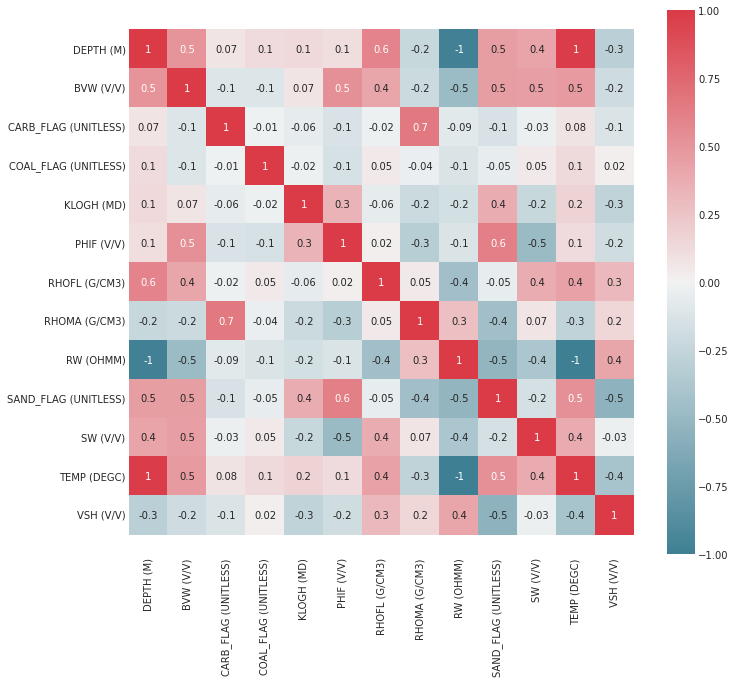

In [14]:
# heatmap to visualize any collinearlity between variables
plt.figure(figsize=(12, 10))
# Colormap definition
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-
            1, vmax=1, center=0, cmap=cmap, square=True)
# matplotlib issue with truncation of top and bottom row
b, t = plt.ylim()
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]), <a list of 10 Text major ticklabel objects>)

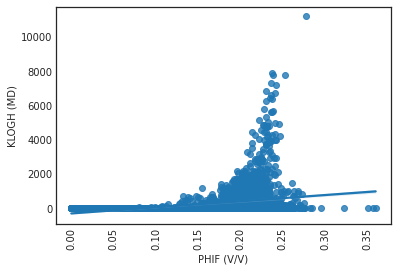

In [15]:
# An example of plot to check collinearity between certain variables
# looking into the correlation between Spacing and NN Spacing - All Zone/Same Zone
sns.regplot(x='PHIF (V/V)', y='KLOGH (MD)', data=data)
plt.xticks(rotation=90)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             4818 non-null   object 
 1   DEPTH (M)             4818 non-null   float64
 2   BVW (V/V)             4818 non-null   float64
 3   CARB_FLAG (UNITLESS)  4818 non-null   float64
 4   COAL_FLAG (UNITLESS)  4818 non-null   float64
 5   KLOGH (MD)            4818 non-null   float64
 6   PHIF (V/V)            4818 non-null   float64
 7   RHOFL (G/CM3)         4818 non-null   float64
 8   RHOMA (G/CM3)         4818 non-null   float64
 9   RW (OHMM)             4818 non-null   float64
 10  SAND_FLAG (UNITLESS)  4818 non-null   float64
 11  SW (V/V)              4818 non-null   float64
 12  TEMP (DEGC)           4818 non-null   float64
 13  VSH (V/V)             4818 non-null   float64
 14  LITHOTYPE             4818 non-null   object 
dtypes: float64(13), objec

In [17]:
# separate categorical columns
columns_categ = ['WELL NAME', 'LITHOTYPE']
data_cont = data.drop(data[columns_categ], axis=1)  # continous data
# move response variable to end of dataframe
data_cont = data_cont[[col for col in data_cont.columns if col != 'KLOGH (MD)'] + ['KLOGH (MD)']]
data_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   PHIF (V/V)            4818 non-null   float64
 5   RHOFL (G/CM3)         4818 non-null   float64
 6   RHOMA (G/CM3)         4818 non-null   float64
 7   RW (OHMM)             4818 non-null   float64
 8   SAND_FLAG (UNITLESS)  4818 non-null   float64
 9   SW (V/V)              4818 non-null   float64
 10  TEMP (DEGC)           4818 non-null   float64
 11  VSH (V/V)             4818 non-null   float64
 12  KLOGH (MD)            4818 non-null   float64
dtypes: float64(13)
memory usage: 687.0 KB


In [18]:
# Splitting the dataset
X = data_cont.iloc[:, :-1]
y = data_cont.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (3613, 12)
Shape of Training y: (3613,)
Shape of Test X: (1205, 12)
Shape of Test y: (1205,)


## **Regression Algorithms**

In [20]:
# defining some functions for regression
# Regression

def reg_metrics(test, pred):
    '''Function returns basic metrics for regression models'''
    print('Mean Absolute Error:', metrics.mean_absolute_error(test, pred))
    print('Mean Squared Error:', metrics.mean_squared_error(test, pred))
    print('Root Mean Squared Error:', np.sqrt(
        metrics.mean_squared_error(test, pred)))
    print('R Squared:', (metrics.r2_score(test, pred)))

def reg_plot(test, pred):
    '''Function returns a regression plot, in the form of a scatter plot'''
    sns.regplot(x=test, y=pred, scatter_kws={
                "color": "black"}, line_kws={"color": "red"})
    plt.xlim(0, max(test))
    plt.ylim(0, max(pred))
    plt.title('Regression Results')
    plt.xlabel('Test Data')
    plt.ylabel('Model Prediction')
    plt.show()

def scatter_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    sns.scatterplot(test.index, test.values, color='red', label='Test data')
    sns.scatterplot(test.index, pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

def line_plot_comparison(test, pred):
    '''Function returns a comparison between test data and predictions, in the form of line plot'''
    plt.plot(test.values, color='red', label='Test data')
    plt.plot(pred, color='blue', label='Predicted data')
    plt.title('Prediction')
    plt.xlabel('Observations')
    plt.ylabel('Test and Predicted Values')
    plt.legend()
    plt.show()

68011.74767189266
[-3.01082813e+01 -1.11653769e+04  3.73278552e+01 -2.62541748e+01
  1.09989811e+04  1.84402537e+04 -2.10856484e+03 -3.00183765e+06
  2.29195288e+02  1.54312725e+03  8.56714954e+02 -1.76746093e+02]


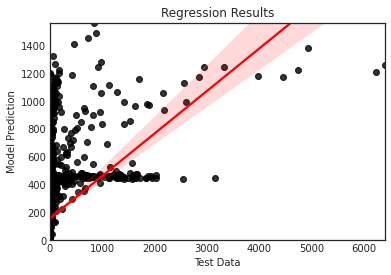

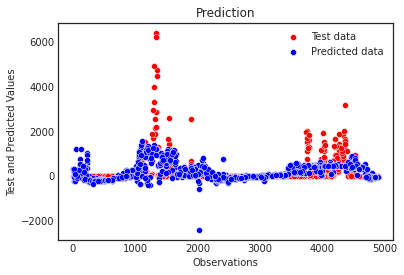

Mean Absolute Error: 283.8971784377532
Mean Squared Error: 245181.58921372303
Root Mean Squared Error: 495.1581456602759
R Squared: 0.14882285596034328


In [21]:
# 1. MLR - Multi Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # training the algorithm
print(lin_reg.intercept_)  # intercept
print(lin_reg.coef_)  # coefficients
# Prediction on test data
y_pred_lin = lin_reg.predict(X_test)
# Regression Plot - Linear Regression
reg_plot(y_test, y_pred_lin)
scatter_plot_comparison(y_test, y_pred_lin)
# Metrics for Linear Regression
reg_metrics(y_test, y_pred_lin)

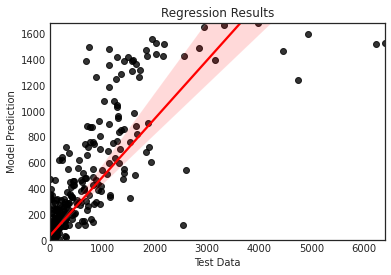

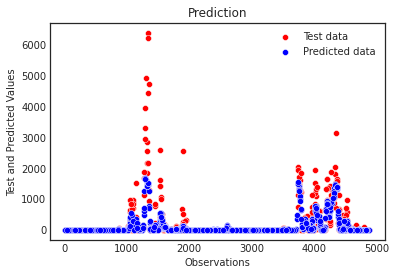

Mean Absolute Error: 82.06389051208198
Mean Squared Error: 112564.26261124818
Root Mean Squared Error: 335.5059799932755
R Squared: 0.6092197302512246


In [22]:
# 2. Support Vector Regression (SVR)
# gaussian kernel selected due to non-linearity in dataset
# Radial basis function - kernel is shown here, other available kernels include 'linear, sigmoid and polynomial'
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_svr = svr_reg.predict(X_test)
# Regression Plot - SVR
reg_plot(y_test, y_pred_svr)
scatter_plot_comparison(y_test, y_pred_svr)
# Metrics for SVR
reg_metrics(y_test, y_pred_svr)

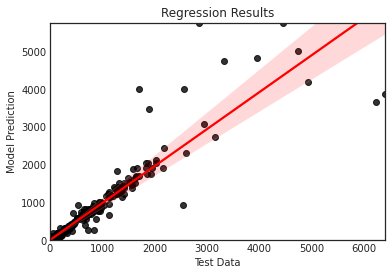

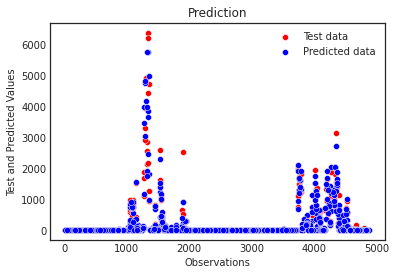

Mean Absolute Error: 29.860805145228216
Mean Squared Error: 35043.59720292721
Root Mean Squared Error: 187.19935150242162
R Squared: 0.878341970619733


In [23]:
# 3. Decision Tree - Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = dt_reg.predict(X_test)
# Regression Plot - Decision Tree
reg_plot(y_test, y_pred_dt)
scatter_plot_comparison(y_test, y_pred_dt)
# Metrics for Decision Tree
reg_metrics(y_test, y_pred_dt)

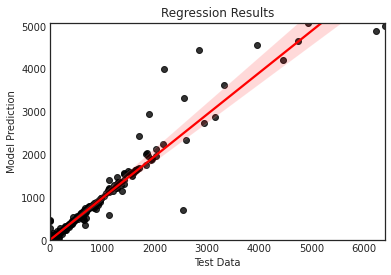

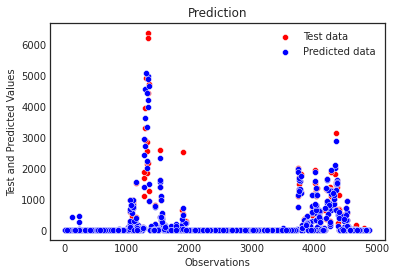

Mean Absolute Error: 19.564007382524213
Mean Squared Error: 14645.463735341618
Root Mean Squared Error: 121.01844378168816
R Squared: 0.9491565250255474


In [24]:
# 4. Random Forest - Regression
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = rf_reg.predict(X_test)
# Regression Plot - Random Forest
reg_plot(y_test, y_pred_rf)
scatter_plot_comparison(y_test, y_pred_rf)
# Metrics for Random Forest
reg_metrics(y_test, y_pred_rf)

[05:10:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


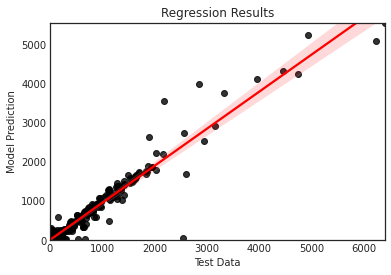

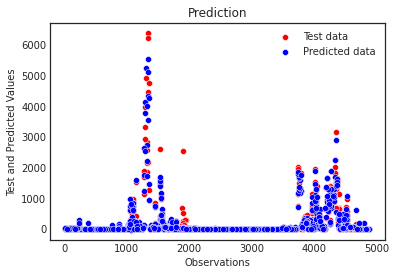

Mean Absolute Error: 34.95929924279304
Mean Squared Error: 14853.490861224791
Root Mean Squared Error: 121.87489840498243
R Squared: 0.948434334034536


In [25]:
# 5. XGBoost - Regression
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
# Prediction on test data
y_pred_xgb = xgb_reg.predict(X_test)
# Regression Plot - XGBoost
reg_plot(y_test, y_pred_xgb)
scatter_plot_comparison(y_test, y_pred_xgb)
# Metrics for XGBoost
reg_metrics(y_test, y_pred_xgb)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
85/85 [==============================] - 2s 7ms/step - loss: 588215.0625 - mse: 588215.0625 - val_loss: 443123.3125 - val_mse: 443123.3125
Epoch 2/1000
85/85 [==============================] - 0s 3ms/step - loss: 581666.9375 - mse: 581666.9375 - val_loss: 433337.5625 - val_mse: 433337.5625
Epoch 3/1000
8

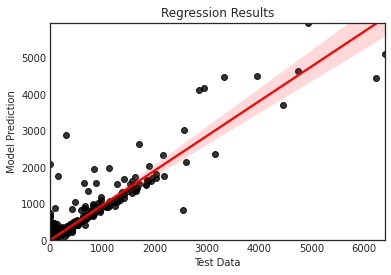

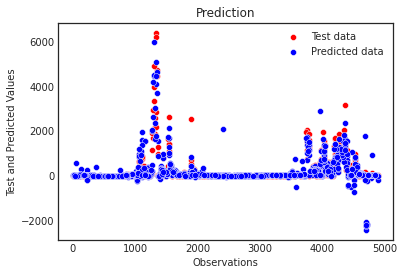

Mean Absolute Error: 82.48480728034616
Mean Squared Error: 74550.4668606508
Root Mean Squared Error: 273.03931376388056
R Squared: 0.7411891583182537


In [26]:
# 6. Artificial Neural Network
# scaling the dataset
std_scalar_X = StandardScaler()
std_scalar_Y = StandardScaler()
X_train_scaled = std_scalar_X.fit_transform(X_train)
X_test_scaled = std_scalar_Y.fit_transform(X_test)

def build_model():
    ann_reg = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1) ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    ann_reg.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return ann_reg

ann_reg = build_model()
ann_reg.summary()

history = ann_reg.fit(X_train_scaled, y_train.values, epochs=1000, validation_split=0.25, verbose=1)
print(history.history.keys())
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')

y_pred_ann = ann_reg.predict(X_test_scaled).flatten()
# Regression Plot - ANN
reg_plot(y_test, y_pred_ann)
scatter_plot_comparison(y_test, y_pred_ann)
# Metrics for ANN
reg_metrics(y_test, y_pred_ann)

## **Classification Algorithms**

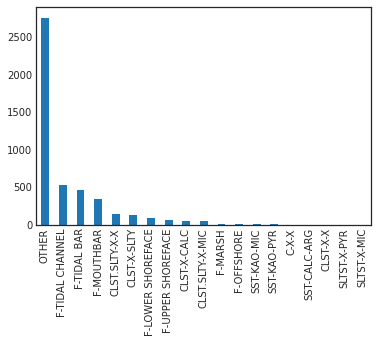

OTHER                2763
F-TIDAL CHANNEL       537
F-TIDAL BAR           476
F-MOUTHBAR            349
CLST.SLTY-X-X         156
CLST-X-SLTY           138
F-LOWER SHOREFACE     105
F-UPPER SHOREFACE      76
CLST-X-CALC            66
CLST.SLTY-X-MIC        59
F-MARSH                20
F-OFFSHORE             20
SST-KAO-MIC            19
SST-KAO-PYR            19
C-X-X                   5
SST-CALC-ARG            4
CLST-X-X                2
SLTST-X-PYR             2
SLTST-X-MIC             2
Name: LITHOTYPE, dtype: int64


In [27]:
# The response variable in the classification is 'Lithotype' with all remaining features as input'
data['LITHOTYPE'].value_counts().plot(kind='bar')
plt.show()
count_categ = data['LITHOTYPE'].value_counts()
print(count_categ)

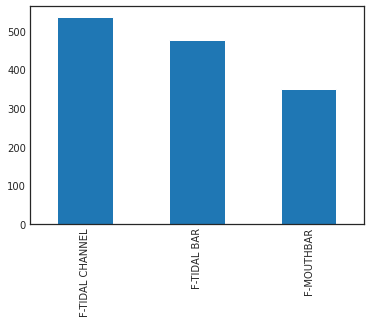

In [28]:
# As observed multiple categories are present, however 'other' won't be considered and
# only the categories with frequency of more than 200 will be included, i.e. 3 categories
data_categ = data[data['LITHOTYPE'].isin(count_categ[count_categ > 200].index)]
data_categ = data_categ[data_categ['LITHOTYPE'] != 'OTHER']
data_categ['LITHOTYPE'].value_counts()
data_categ['LITHOTYPE'].value_counts().plot(kind='bar')

In [29]:
data_categ.drop('WELL NAME', axis=1, inplace=True)
data_categ.info()
data_categ.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB


,DEPTH (M),BVW (V/V),CARB_FLAG (UNITLESS),COAL_FLAG (UNITLESS),KLOGH (MD),PHIF (V/V),RHOFL (G/CM3),RHOMA (G/CM3),RW (OHMM),SAND_FLAG (UNITLESS),SW (V/V),TEMP (DEGC),VSH (V/V),LITHOTYPE
1018,3821.73,0.06,0.00,0.00,121.27,0.17,0.80,2.66,0.02,1.00,0.38,116.35,0.14,F-TIDAL BAR
1019,3821.89,0.05,1.00,0.00,0.10,0.12,0.80,2.71,0.02,0.00,0.44,116.35,0.12,F-TIDAL BAR
1020,3822.04,0.05,1.00,0.00,0.10,0.12,0.80,2.71,0.02,0.00,0.39,116.36,0.13,F-TIDAL BAR
1021,3822.19,0.04,1.00,0.00,0.10,0.11,0.80,2.71,0.02,0.00,0.38,116.36,0.11,F-TIDAL BAR
1022,3822.34,0.04,1.00,0.00,0.10,0.10,0.80,2.71,0.02,0.00,0.41,116.36,0.13,F-TIDAL BAR
1023,3822.50,0.04,1.00,0.00,0.10,0.10,0.80,2.71,0.02,0.00,0.44,116.37,0.11,F-TIDAL BAR
1024,3822.65,0.05,1.00,0.00,0.10,0.14,0.80,2.71,0.02,1.00,0.36,116.37,0.13,F-TIDAL BAR
1025,3822.80,0.05,0.00,0.00,43.90,0.14,0.80,2.66,0.02,1.00,0.37,116.37,0.16,F-TIDAL BAR
1026,3822.95,0.05,0.00,0.00,84.11,0.16,0.80,2.66,0.02,1.00,0.32,116.38,0.15,F-TIDAL BAR
1027,3823.11,0.05,0.00,0.00,79.38,0.15,0.80,2.66,0.02,1.00,0.34,116.38,0.14,F-TIDAL BAR


In [30]:
X = data_categ.iloc[:, :-1]
y = data_categ.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
print('Shape of Training X:', X_train.shape)
print('Shape of Training y:', y_train.shape)
print('Shape of Test X:', X_test.shape)
print('Shape of Test y:', y_test.shape)

Shape of Training X: (1021, 13)
Shape of Training y: (1021,)
Shape of Test X: (341, 13)
Shape of Test y: (341,)


In [32]:
# defining function for classification metrics
def clf_metrics(test, pred):
    '''Function returns basic metrics for classification models'''
    print('Classification Accuracy Score:', accuracy_score(test, pred))
    print('Confusion Matrix: \n', confusion_matrix(test, pred))
    print('Classification Report: \n', classification_report(test, pred))

In [33]:
# 1. Logistic Regression
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train, y_train)
# Prediction on test data
y_pred_logreg = clf_logreg.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_logreg)

Classification Accuracy Score: 0.6480938416422287
Confusion Matrix: 
 [[  4  70  13]
 [  5 102  12]
 [  1  19 115]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.05      0.08        87
    F-TIDAL BAR       0.53      0.86      0.66       119
F-TIDAL CHANNEL       0.82      0.85      0.84       135

       accuracy                           0.65       341
      macro avg       0.59      0.58      0.53       341
   weighted avg       0.61      0.65      0.58       341



In [34]:
# 2. SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Prediction on test data
y_pred_svc = clf_svc.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_svc)

Classification Accuracy Score: 0.6217008797653959
Confusion Matrix: 
 [[  0  76  11]
 [  0 103  16]
 [  0  26 109]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.00      0.00      0.00        87
    F-TIDAL BAR       0.50      0.87      0.64       119
F-TIDAL CHANNEL       0.80      0.81      0.80       135

       accuracy                           0.62       341
      macro avg       0.43      0.56      0.48       341
   weighted avg       0.49      0.62      0.54       341



In [35]:
# 3. Decision Tree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# Prediction on test data
y_pred_dt = clf_dt.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_dt)

Classification Accuracy Score: 0.9853372434017595
Confusion Matrix: 
 [[ 85   1   1]
 [  2 116   1]
 [  0   0 135]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.98      0.98      0.98        87
    F-TIDAL BAR       0.99      0.97      0.98       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.99       341
      macro avg       0.98      0.98      0.98       341
   weighted avg       0.99      0.99      0.99       341



In [36]:
# 4. Random Forest Classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
# Prediction on test data
y_pred_rf = clf_rf.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_rf)

Classification Accuracy Score: 0.9882697947214076
Confusion Matrix: 
 [[ 85   1   1]
 [  1 117   1]
 [  0   0 135]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.99      0.98      0.98        87
    F-TIDAL BAR       0.99      0.98      0.99       119
F-TIDAL CHANNEL       0.99      1.00      0.99       135

       accuracy                           0.99       341
      macro avg       0.99      0.99      0.99       341
   weighted avg       0.99      0.99      0.99       341



In [37]:
# 5. KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# Prediction on test data
y_pred_knn = clf_knn.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_knn)

Classification Accuracy Score: 0.8592375366568915
Confusion Matrix: 
 [[ 65  14   8]
 [  7 101  11]
 [  6   2 127]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.83      0.75      0.79        87
    F-TIDAL BAR       0.86      0.85      0.86       119
F-TIDAL CHANNEL       0.87      0.94      0.90       135

       accuracy                           0.86       341
      macro avg       0.86      0.85      0.85       341
   weighted avg       0.86      0.86      0.86       341



In [38]:
# 6. GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
# Prediction on test data
y_pred_gnb = clf_gnb.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_gnb)

Classification Accuracy Score: 0.6099706744868035
Confusion Matrix: 
 [[ 47  20  20]
 [ 62  41  16]
 [  9   6 120]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.40      0.54      0.46        87
    F-TIDAL BAR       0.61      0.34      0.44       119
F-TIDAL CHANNEL       0.77      0.89      0.82       135

       accuracy                           0.61       341
      macro avg       0.59      0.59      0.57       341
   weighted avg       0.62      0.61      0.60       341



In [39]:
# 7. LDA
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)
# Prediction on test data
y_pred_lda = clf_lda.predict(X_test)
# Accuracy Metrics
clf_metrics(y_test, y_pred_lda)

Classification Accuracy Score: 0.7800586510263929
Confusion Matrix: 
 [[ 49  29   9]
 [ 13  97   9]
 [  5  10 120]]
Classification Report: 
                  precision    recall  f1-score   support

     F-MOUTHBAR       0.73      0.56      0.64        87
    F-TIDAL BAR       0.71      0.82      0.76       119
F-TIDAL CHANNEL       0.87      0.89      0.88       135

       accuracy                           0.78       341
      macro avg       0.77      0.76      0.76       341
   weighted avg       0.78      0.78      0.78       341



In [40]:
# 8. ANN

dataset = data_categ.values
X = dataset[:,0:12].astype(float)
Y = dataset[:,13]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# creating a dummy variable
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.25, random_state=42)

# define baseline model
def baseline_model():
    # create model
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, input_dim=12, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

ann_clf = baseline_model()
ann_clf.summary()

ann_classifier = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=1)
# Cross Validation Score
kfold = KFold(n_splits=3, shuffle=True)
results = cross_val_score(ann_classifier, X, dummy_y, cv=kfold)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5,187
Trainable params: 5,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
182/182 [==============================] - 1s 2ms/step - loss: 29.6697 - acc: 0.5330
Epoch 2/200
182/182 [==============================] - 0s 2ms/step - loss: 14.5636 - acc: 0.5176
Epoch 3/200
182/182 [==============================] - 0s 2ms/step - loss: 12.5910 - acc: 0.5121
Epoch 4/200
182/182 [====

In [41]:
print("Base Model Accuracy (Standard Deviation): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Base Model Accuracy (Standard Deviation): 61.97% (2.96%)


## **Unsupervised Learning**

In [42]:
# original dataset with all features
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WELL NAME             4818 non-null   object 
 1   DEPTH (M)             4818 non-null   float64
 2   BVW (V/V)             4818 non-null   float64
 3   CARB_FLAG (UNITLESS)  4818 non-null   float64
 4   COAL_FLAG (UNITLESS)  4818 non-null   float64
 5   KLOGH (MD)            4818 non-null   float64
 6   PHIF (V/V)            4818 non-null   float64
 7   RHOFL (G/CM3)         4818 non-null   float64
 8   RHOMA (G/CM3)         4818 non-null   float64
 9   RW (OHMM)             4818 non-null   float64
 10  SAND_FLAG (UNITLESS)  4818 non-null   float64
 11  SW (V/V)              4818 non-null   float64
 12  TEMP (DEGC)           4818 non-null   float64
 13  VSH (V/V)             4818 non-null   float64
 14  LITHOTYPE             4818 non-null   object 
dtypes: float64(13), objec

,WELL NAME,DEPTH (M),BVW (V/V),CARB_FLAG (UNITLESS),COAL_FLAG (UNITLESS),KLOGH (MD),PHIF (V/V),RHOFL (G/CM3),RHOMA (G/CM3),RW (OHMM),SAND_FLAG (UNITLESS),SW (V/V),TEMP (DEGC),VSH (V/V),LITHOTYPE
0,15/9-19 A,3666.59,0.11,0.00,0.00,0.00,0.20,0.80,2.66,0.02,0.00,0.56,112.72,0.60,OTHER
1,15/9-19 A,3666.74,0.11,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.51,112.73,0.60,OTHER
2,15/9-19 A,3666.90,0.11,0.00,0.00,0.00,0.24,0.80,2.66,0.02,0.00,0.47,112.73,0.60,OTHER
3,15/9-19 A,3667.05,0.11,0.00,0.00,0.00,0.23,0.80,2.66,0.02,0.00,0.51,112.74,0.60,OTHER
4,15/9-19 A,3667.20,0.12,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.54,112.74,0.60,CLST.SLTY-X-X
5,15/9-19 A,3667.35,0.11,0.00,0.00,0.00,0.18,0.80,2.66,0.02,0.00,0.63,112.74,0.60,OTHER
6,15/9-19 A,3667.51,0.12,0.00,0.00,0.00,0.20,0.80,2.66,0.02,0.00,0.60,112.75,0.60,OTHER
7,15/9-19 A,3667.66,0.12,0.00,0.00,0.00,0.22,0.80,2.66,0.02,0.00,0.57,112.75,0.60,OTHER
8,15/9-19 A,3667.81,0.13,0.00,0.00,0.00,0.24,0.80,2.66,0.02,0.00,0.53,112.75,0.60,OTHER
9,15/9-19 A,3667.96,0.13,0.00,0.00,0.00,0.26,0.80,2.66,0.02,0.00,0.50,112.76,0.61,CLST.SLTY-X-X


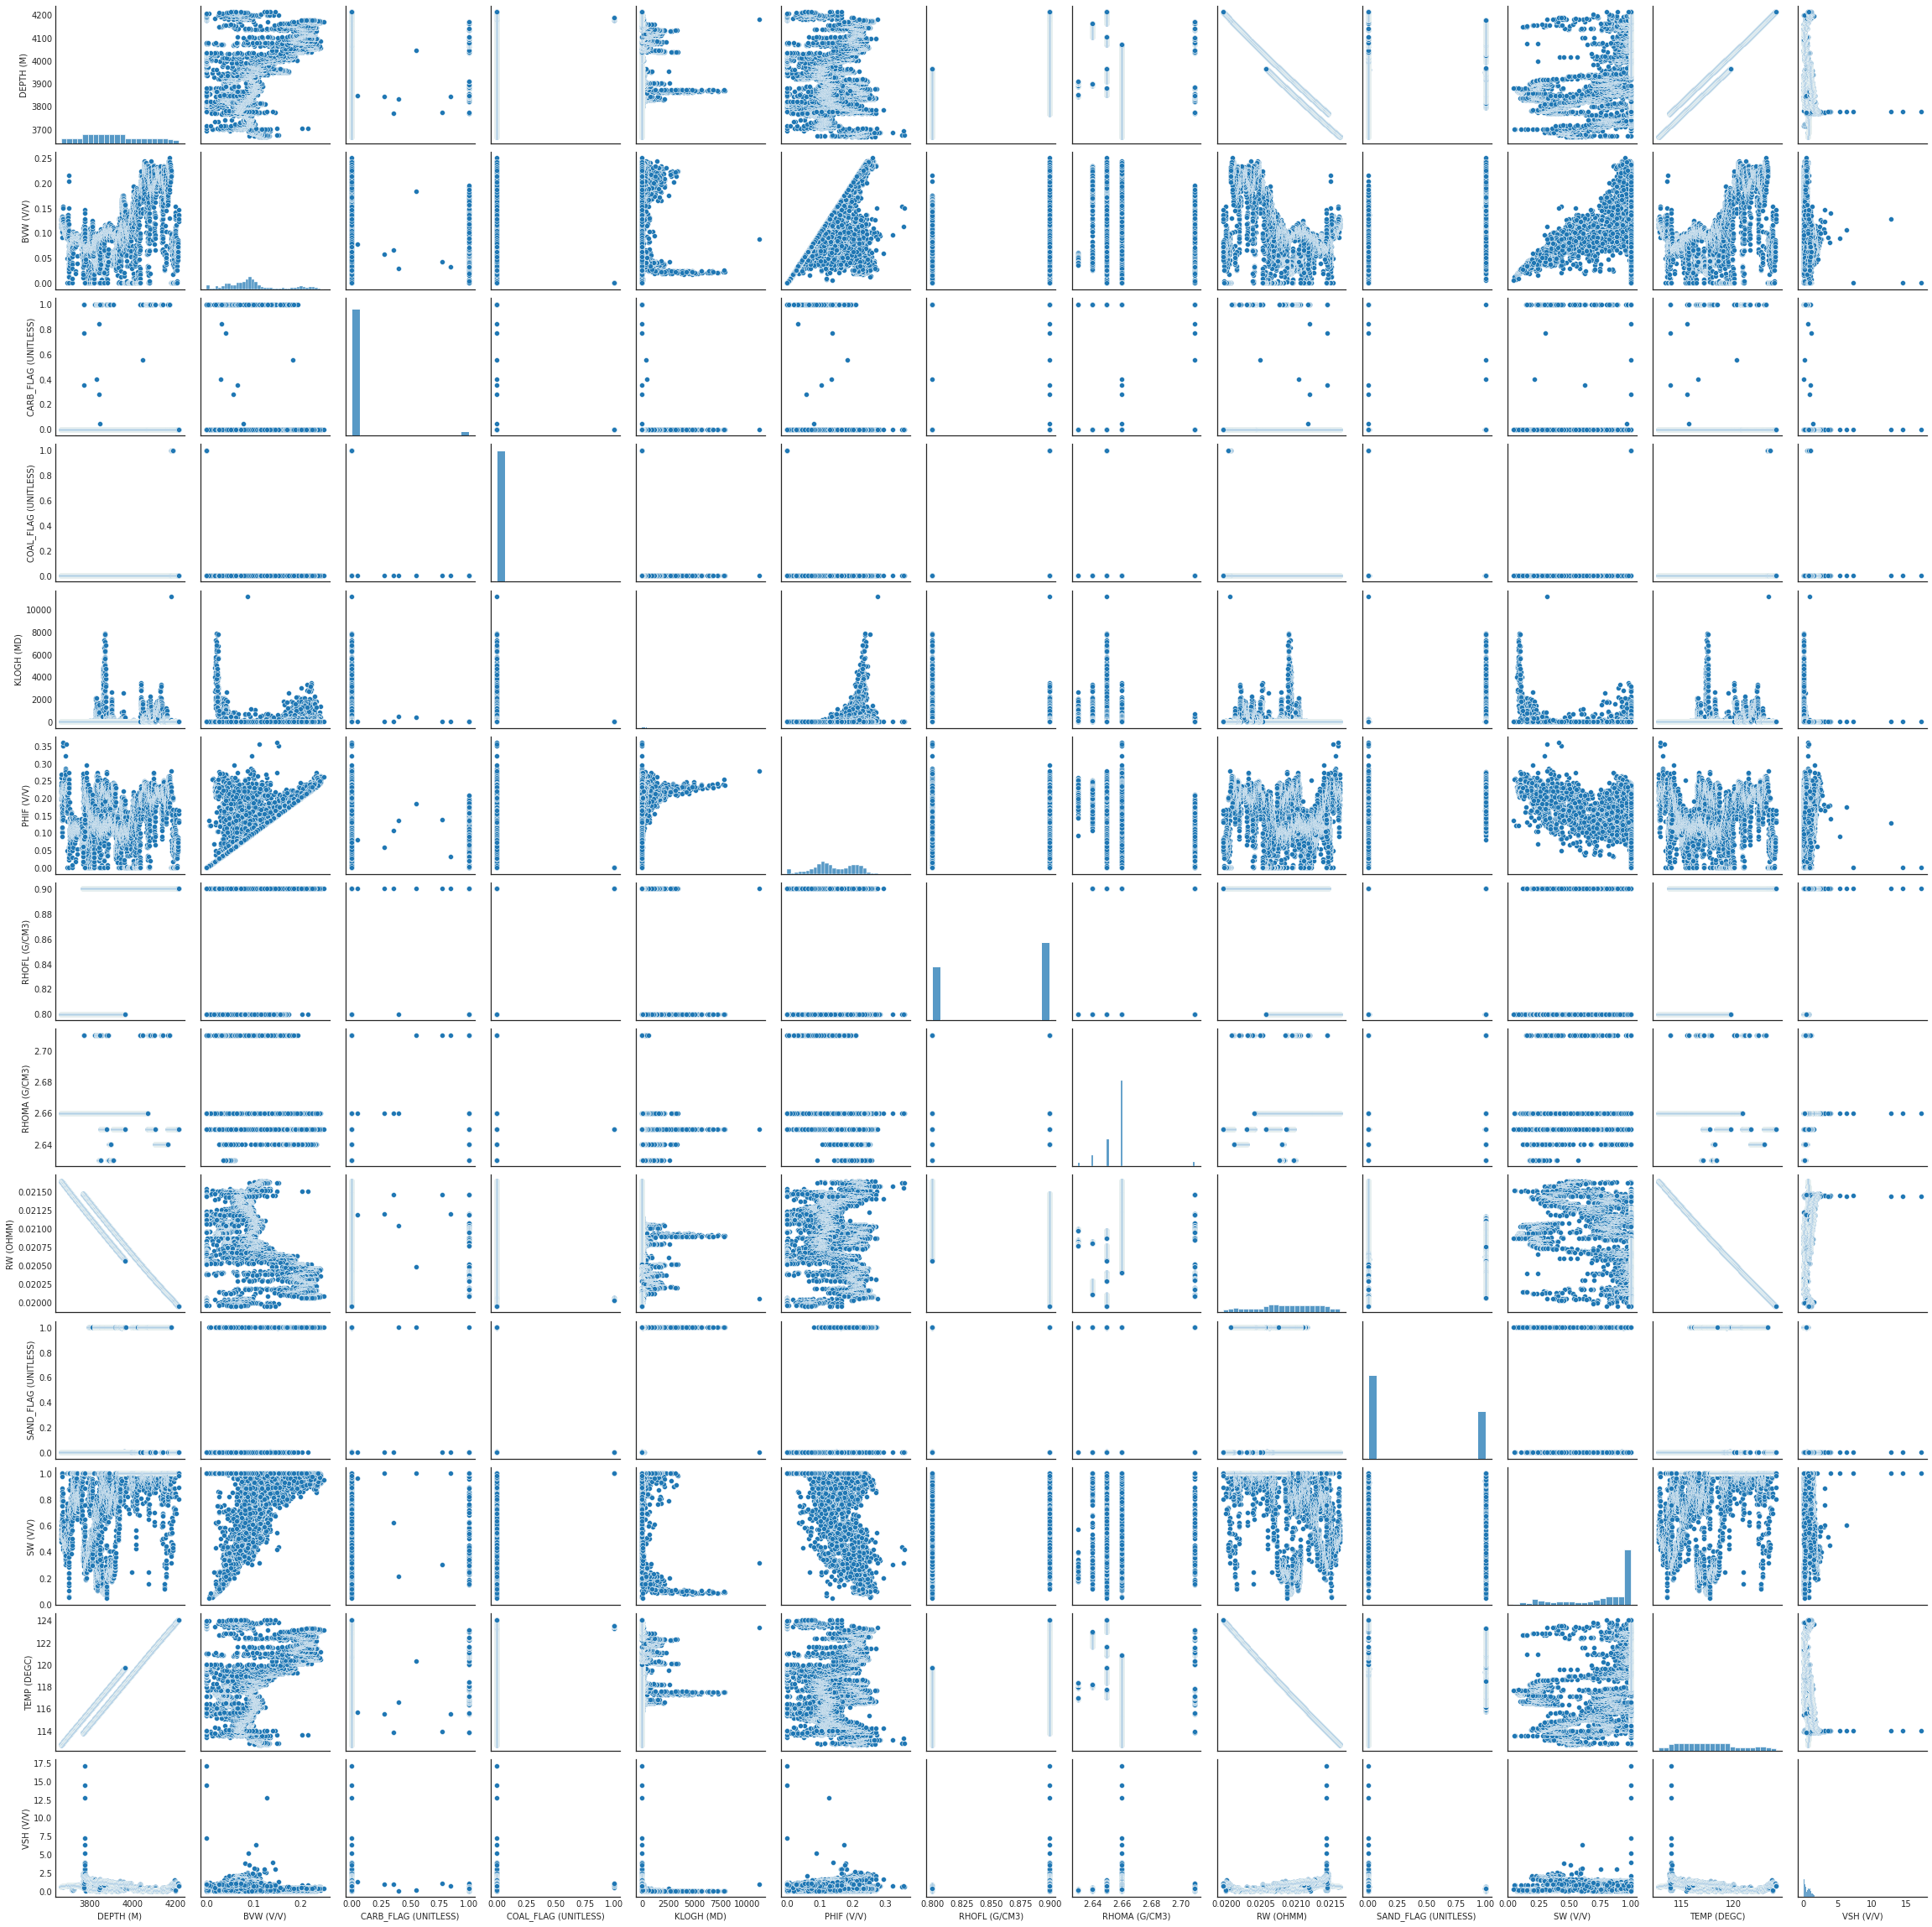

In [43]:
sns.pairplot(data)

In [44]:
X = data.drop(['WELL NAME', 'LITHOTYPE'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 0 to 4890
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             4818 non-null   float64
 1   BVW (V/V)             4818 non-null   float64
 2   CARB_FLAG (UNITLESS)  4818 non-null   float64
 3   COAL_FLAG (UNITLESS)  4818 non-null   float64
 4   KLOGH (MD)            4818 non-null   float64
 5   PHIF (V/V)            4818 non-null   float64
 6   RHOFL (G/CM3)         4818 non-null   float64
 7   RHOMA (G/CM3)         4818 non-null   float64
 8   RW (OHMM)             4818 non-null   float64
 9   SAND_FLAG (UNITLESS)  4818 non-null   float64
 10  SW (V/V)              4818 non-null   float64
 11  TEMP (DEGC)           4818 non-null   float64
 12  VSH (V/V)             4818 non-null   float64
dtypes: float64(13)
memory usage: 687.0 KB


Text(0, 0.5, 'Inertia')

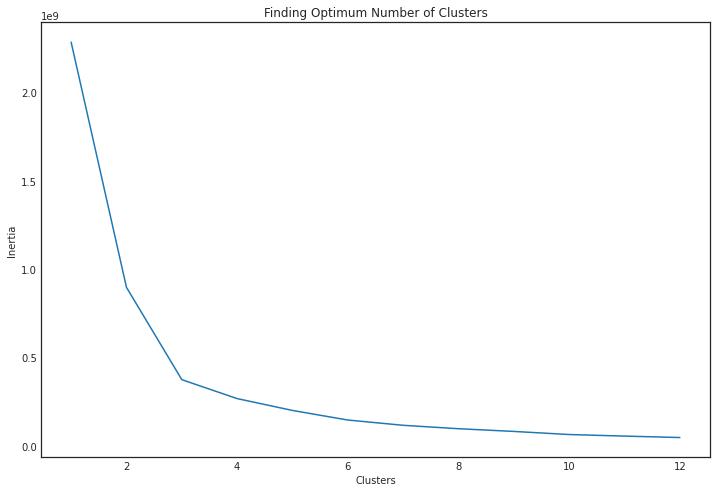

In [45]:
# KMeans Clustering

# finding the optimum number of clusters in the dataset
clusters = []
for i in range(1, 13):
    km = cluster.KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

# finding the number of clusters
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 13)), y=clusters, ax=ax)
ax.set_title('Finding Optimum Number of Clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Text(0.5, 1.0, 'KMeans with 3 Clusters')

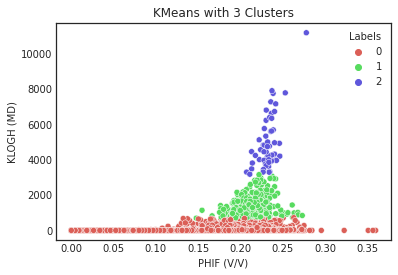

In [46]:
#  Visual Plot - 3 cluster
km3 = cluster.KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(X)
X['Labels'] = km3.labels_
X['Labels'].value_counts()
sns.scatterplot(X['PHIF (V/V)'], X['KLOGH (MD)'], hue=X['Labels'], palette=sns.color_palette('hls', X['Labels'].nunique()))
plt.title('KMeans with 3 Clusters')

In [47]:
# PCA 

data_categ.info()
dataset = data_categ.values
# One hot encoding example instead of LabelEncoder used earlier
# Encoding - Convert categorical variables to numerical form, to execute machine learning algorithms
X = data_categ.drop('LITHOTYPE', 1)
y = data_categ['LITHOTYPE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362 entries, 1018 to 4658
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DEPTH (M)             1362 non-null   float64
 1   BVW (V/V)             1362 non-null   float64
 2   CARB_FLAG (UNITLESS)  1362 non-null   float64
 3   COAL_FLAG (UNITLESS)  1362 non-null   float64
 4   KLOGH (MD)            1362 non-null   float64
 5   PHIF (V/V)            1362 non-null   float64
 6   RHOFL (G/CM3)         1362 non-null   float64
 7   RHOMA (G/CM3)         1362 non-null   float64
 8   RW (OHMM)             1362 non-null   float64
 9   SAND_FLAG (UNITLESS)  1362 non-null   float64
 10  SW (V/V)              1362 non-null   float64
 11  TEMP (DEGC)           1362 non-null   float64
 12  VSH (V/V)             1362 non-null   float64
 13  LITHOTYPE             1362 non-null   object 
dtypes: float64(13), object(1)
memory usage: 159.6+ KB
[4.32302153e-01 2.4

In [48]:
# 4 components can explain around 86.6% variablility 
# only 4 components will be used to test classification 
pca_4comp = PCA(n_components=4)
X_train_4comp = pca_4comp.fit_transform(X_train)
X_test_4comp = pca_4comp.transform(X_test)

In [49]:
# Random Forest with entire data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 60   3   3]
 [  2  83   7]
 [  1   1 113]]
0.9377289377289377


In [50]:
# Random Forest with only 4 components
classifier_4comp = RandomForestClassifier(random_state=42)
classifier_4comp.fit(X_train_4comp, y_train)
# Predicting the Test set results
y_pred_4comp= classifier_4comp.predict(X_test_4comp)
print(confusion_matrix(y_test, y_pred_4comp))
print(accuracy_score(y_test, y_pred_4comp))

[[ 58   6   2]
 [  5  80   7]
 [  4   4 107]]
0.8974358974358975
